## This Jupyter NB is dedicated to Joseph Long

In [1]:
import fixr
import lookyloo
from lookyloo.core import get_matching_paths
import pathlib
import datetime
import numpy as np
from astropy.io import fits
from importlib import reload
from matplotlib import pyplot as plt


ModuleNotFoundError: No module named 'fixr'

In [68]:
import spark_xrif as sx
reload(sx)

<module 'spark_xrif' from '/home/eden/code/testing/spark_xrif.py'>

## testing new sparkle code

In [40]:
test_sx = sx.SparkXrif('sparkle_2kHz_test_turb_2', 'sparkle_2kHz_test_noturb', sx.glob_dir_calib, sx.glob_dark, sx.glob_mask, sx.glob_ref)

Number of DATA files:  694272
Number of REF files:  911872
GENERATING REFERENCE
PULLING 1024 FILES
FILE no 3, n_start 0, n 1024, n_offset 0
XRIF index 0, no of files 3, len list 1781
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7794825 bytes
  ratio:              0.529

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7795127 bytes
  ratio:              0.529

xrif compre

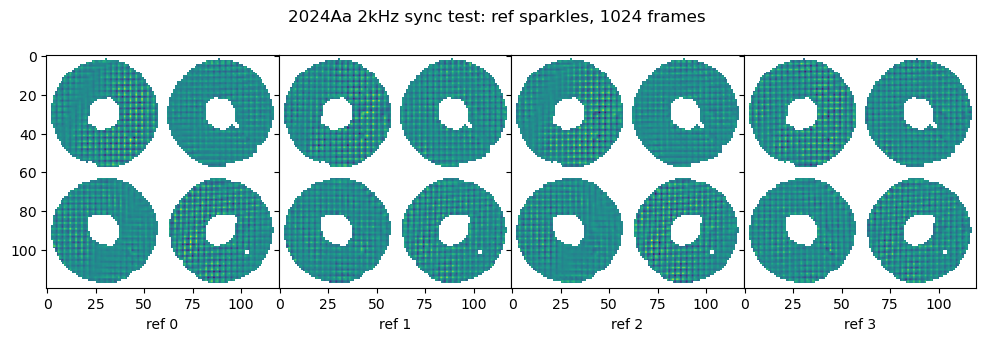

In [41]:
#checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"2024Aa 2kHz sync test: ref sparkles, 1024 frames", y=0.90)

lab_ref_data = test_sx.labref_norm

for e in range(4):
    axs[e].imshow(lab_ref_data[e]**test_sx.mask_nan, label = f'ref {e}', vmax = np.max(lab_ref_data), vmin = np.min(lab_ref_data))
    axs[e].set_xlabel(f"ref {e}")

#### Testing the new flexible averaging code

In [42]:
avg1000_results = test_sx.dot_list_pool_avg(n=10000, avg=500)

[0, 2000, 4000, 6000, 8000]
N = 10000, chunk size = 2000, N_Chunks 5
PULLING 2000 FILES
FILE no 4, n_start 0, n 2000, n_offset 0
XRIF index 0, no of files 4, len list 1356
PULLING 2000 FILES
FILE no 4, n_start 4000, n 2000, n_offset 416
XRIF index 7, no of files 4, len list 1356
PULLING 2000 FILES
FILE no 4, n_start 8000, n 2000, n_offset 320
XRIF index 15, no of files 4, len list 1356
chunksize=2, n_workers=4
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7627723 bytes
  ratio:              0.517

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7620286 bytes
  ratio:              0.517

xrif compression detai

In [15]:
np.array(avg1000_results).shape

(2, 4, 4)

In [ ]:
#checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"LAB 2kHz sync test: testing dynamic averaging", y=0.90)

for e in range(4):
    axs[e].imshow(sky_ref_data[e]*test_sx.mask_nan, label = f'ref {e}',)
    axs[e].set_xlabel(f"ref {e}")

#### What are the dot references in this cube?

In [10]:
# dot product 
labdata = test_sx.labref_norm

dotproduct = np.array([[np.dot(d.flatten(),h.flatten())  for d in labdata] for h in labdata])

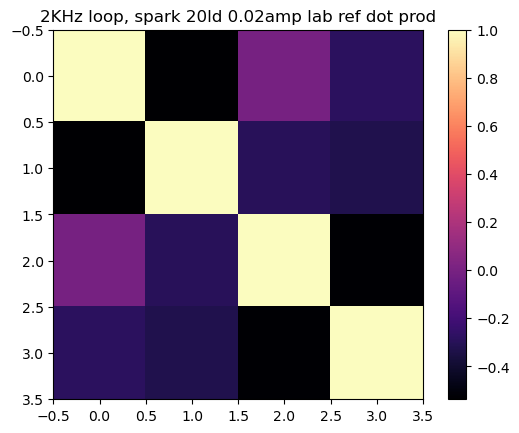

In [17]:
plt.title('2KHz loop, spark 20ld 0.02amp lab ref dot prod')
plt.imshow(dotproduct, cmap='magma')
plt.colorbar()

In [19]:
# check a set of turbulence frames:
turb_file_lists = sx.gen_file_list(test_sx.sky_obs_span)
clean_files, ts = test_sx.file_sample_n_clean(turb_file_lists, 512*20)
data_splt = np.array(sx.split_data(clean_files))

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7627723 bytes
  ratio:              0.517

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7627235 bytes
  ratio:              0.517

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:

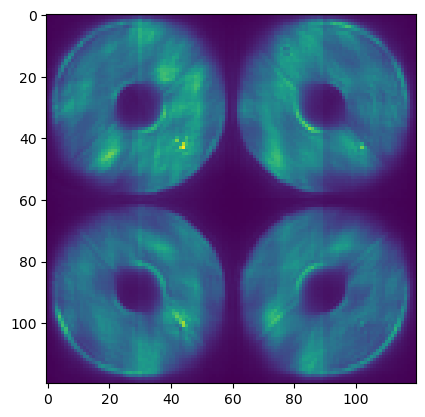

In [178]:
ref_file = sx.glob_dir_calib + sx.glob_ref

data  = fits.open(ref_file)[0].data

plt.imshow(data)

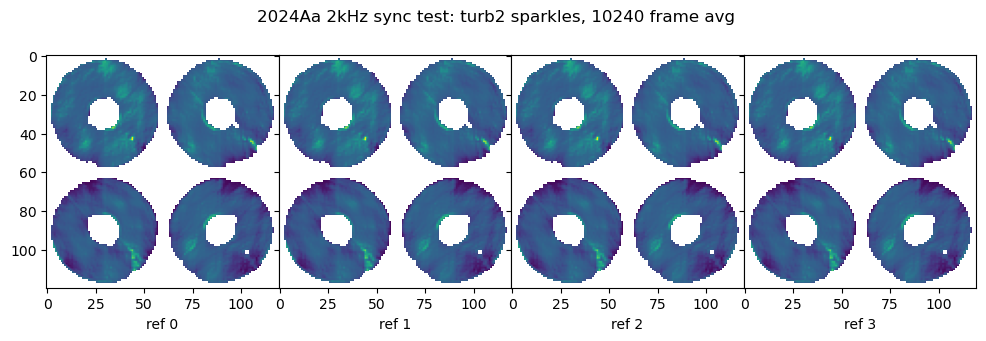

In [23]:
#checking the lab reference: 
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4), facecolor='white', sharey=True)
fig.subplots_adjust(wspace=0)
plt.suptitle(f"2024Aa 2kHz sync test: turb2 sparkles, 10240 frame avg", y=0.90)

sky_ref_data = np.mean(data_splt, axis=1)

for e in range(4):
    axs[e].imshow(sky_ref_data[e]*test_sx.mask_nan, label = f'ref {e}',)
    axs[e].set_xlabel(f"ref {e}")

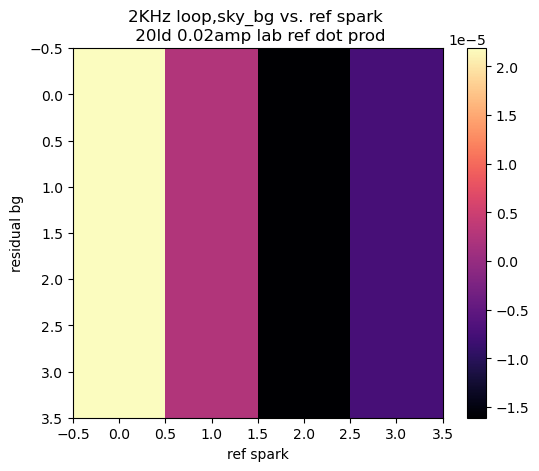

In [25]:
# figure out how much this residual is seen in a dot product with sparkles
dotproduct2 = np.array([[np.dot(d.flatten(),h.flatten())  for d in labdata] for h in sky_ref_data])

plt.title('2KHz loop,sky_bg vs. ref spark \n 20ld 0.02amp lab ref dot prod')
plt.imshow(dotproduct2, cmap='magma')
plt.xlabel('ref spark')
plt.ylabel('residual bg')
plt.colorbar()

In [18]:
results = test_sx.dot_list_pool(n=50000)

chunksize=25, n_workers=4
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7627764 bytes
  ratio:              0.517

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7625733 bytes
  ratio:              0.517

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7627723 bytes
  ratio:              0.517
xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         

In [13]:
results_avg = test_sx.dot_list_pool(n=50000, avg=True)

chunksize=25, n_workers=4
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       8313466 bytes
  ratio:              0.564

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       8443978 bytes
  ratio:              0.573

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000
xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20

In [21]:
results = np.array(results)
results_deroll = sx.split_data_dot_roll(results)
#results_avg_deroll = sx.split_data_dot_roll(results_avg)

split roll  (392, 4)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

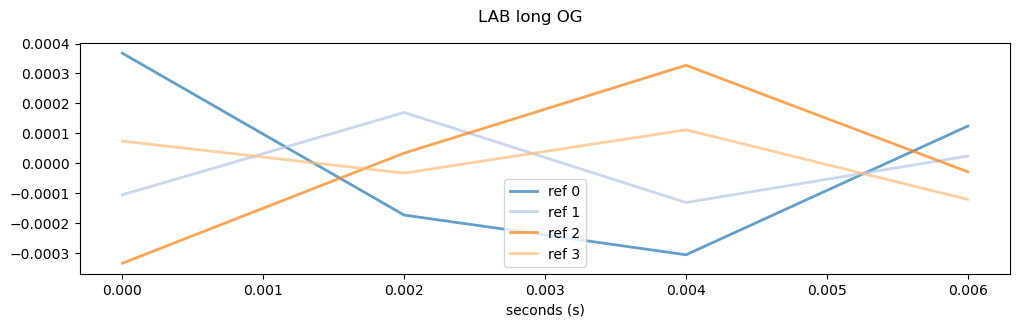

In [22]:
sx.plot_time_series(results, 'LAB long OG', ref_avg = test_sx.ref_avg)

## lookyloo stuff

In [90]:
d = pathlib.Path('/data/rawimages/camwfs/')
device = 'camwfs'
extension = 'xrif'

In [91]:
# want to find my stuff

# look at all the stuff since 2024 -> get a set of observation spans
to_the_telemetry = pathlib.Path('/srv/aoc/data/') # this is where we expect to see the observer telemetry. but the mount seems un-mounty
where_to_start = datetime.datetime(2024, 1, 1, tzinfo=datetime.timezone.utc)
set_of_things, _ = lookyloo.core.get_new_observation_spans(data_roots=[to_the_telemetry], existing_observation_spans=set(), start_dt=where_to_start)
# filter the observation spans on my email
my_stuff = [x for x in set_of_things if 'eden' in x.email]

# find the observation that matches my title. 
def find_my_title(title, stuff):
    contains_title = [x for x in stuff if title in x.title]
    return contains_title
# these were the results I was looking for
my_results = find_my_title('sparkles_bad_seeing', my_stuff)


In [92]:
my_results

[ObservationSpan(email='edenmcewen@arizona.edu', title='sparkles_bad_seeing_bright_05amp', begin=datetime.datetime(2024, 3, 19, 7, 37, 36, 707131, tzinfo=datetime.timezone.utc), end=datetime.datetime(2024, 3, 19, 7, 45, 54, 736521, tzinfo=datetime.timezone.utc)),
 ObservationSpan(email='edenmcewen@arizona.edu', title='sparkles_bad_seeing_bright_02amp', begin=datetime.datetime(2024, 3, 19, 7, 25, 58, 920852, tzinfo=datetime.timezone.utc), end=datetime.datetime(2024, 3, 19, 7, 36, 0, 329211, tzinfo=datetime.timezone.utc)),
 ObservationSpan(email='edenmcewen@arizona.edu', title='sparkles_bad_seeing_bright_02amp', begin=datetime.datetime(2024, 3, 19, 7, 25, 52, 669235, tzinfo=datetime.timezone.utc), end=datetime.datetime(2024, 3, 19, 7, 25, 56, 2811, tzinfo=datetime.timezone.utc))]

In [93]:
# now look at an obervation , send 
datetime_newer = my_results[1].begin
datetime_older = my_results[1].end

In [94]:
obs_files = lookyloo.core.get_matching_paths(d, device, extension, datetime_newer, datetime_older)

In [95]:
obs_files

[TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072558998866000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 58, 998866, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559254866000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 254866, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559510867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 510867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559766867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 766867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072600022867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 26, 0, 22867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_2024

In [97]:
# search files
sorted(obs_files, key=lambda obs: obs.timestamp)


[TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072558998866000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 58, 998866, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559254866000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 254866, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559510867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 510867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072559766867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 25, 59, 766867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_20240319072600022867000.xrif'), timestamp=datetime.datetime(2024, 3, 19, 7, 26, 0, 22867, tzinfo=datetime.timezone.utc)),
 TimestampedFile(path=PosixPath('/data/rawimages/camwfs/camwfs_2024

In [7]:
print(obs_files[1])
fh = open(obs_files[1].path, 'rb')
data = fixr.xrif2numpy(fh)
timing = fixr.xrif2numpy(fh)

<TimestampedFile: /data/rawimages/camwfs/camwfs_20240319072559254866000.xrif at 2024-03-19T07:25:59.254866>
xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       8723385 bytes
  ratio:              0.592

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000



In [12]:
data2 = np.reshape(data, (512,120,120))

In [13]:
timing2 = np.reshape(timing, (512,5))

In [16]:
timing2

array([[  23260016, 1710833159,  254866000, 1710833159,  254918197],
       [  23260017, 1710833159,  255367000, 1710833159,  255420484],
       [  23260018, 1710833159,  255866000, 1710833159,  255918033],
       ...,
       [  23260525, 1710833159,  509367000, 1710833159,  509419062],
       [  23260526, 1710833159,  509867000, 1710833159,  509917763],
       [  23260527, 1710833159,  510367000, 1710833159,  510419088]],
      dtype=uint64)

# fixer tests

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7446095 bytes
  ratio:              0.505



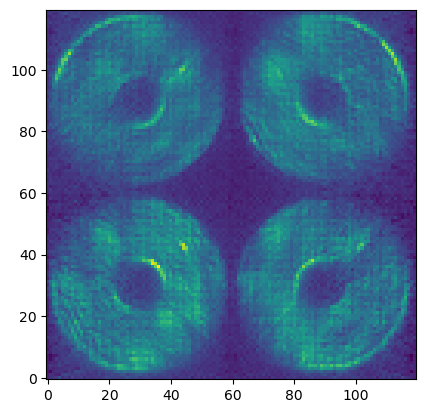

In [3]:
import ctypes
import numpy as np
from fixr import _xrif as xrif
# open file in binary mode
fh = open('/data/rawimages/camwfs/camwfs_20240315225750994842000.xrif', 'rb')

# allocate and initialize xrif handle
reader = xrif.xrif_t()
xrif.xrif_new(reader)

# read one header's worth of bytes
buf = fh.read(xrif.XRIF_HEADER_SIZE)
header_size_ptr = ctypes.c_uint32()
# populate header fields in reader
xrif.xrif_read_header(reader, header_size_ptr, buf)


def describe_xrif(reader):
    # helper to turn turn byte strings into Python strings
    get_string = lambda x: ctypes.string_at(x).decode('utf8')

    # construct a report like xrif2fits has
    s = 'xrif compression details:\n'
    difference_method = get_string(xrif.xrif_difference_method_string(reader.contents.difference_method))
    s += f"  difference method:  {difference_method}\n"
    reorder_method = get_string(xrif.xrif_reorder_method_string(reader.contents.reorder_method))
    s += f"  reorder method:     {reorder_method}\n"
    compress_method = get_string(xrif.xrif_compress_method_string(reader.contents.compress_method))
    s += f"  compression method: {compress_method}\n"
    if reader.contents.compress_method == xrif.XRIF_COMPRESS_LZ4:
        s += f"    LZ4 acceleration: {int(reader.contents.lz4_acceleration)}\n"

    s += f"  dimensions:         {reader.contents.width} x {reader.contents.height} x {reader.contents.depth} x {reader.contents.frames}\n"
    raw_size = reader.contents.width * reader.contents.height * reader.contents.depth * reader.contents.frames * reader.contents.data_size
    s += f"  raw size:           {raw_size} bytes\n"
    compressed_size = int(reader.contents.compressed_size)
    s += f"  encoded size:       {compressed_size} bytes\n"
    s += f"  ratio:              {compressed_size / raw_size:.3f}\n"

    return s
print(describe_xrif(reader))

# we don't need the reordering buffer, let xrif handle it (remember to free later)
rv = xrif.xrif_allocate_reordered(reader)
if rv != xrif.XRIF_NOERROR:
    raise RuntimeError("??")

# xrif can save you a buffer by decompressing into the raw buffer but that
# means it needs to be bigger than just `compressed_size`
min_buf_size = xrif.xrif_min_raw_size(reader)
# we need to own the raw (and then decompressed) buffer
buf = ctypes.c_buffer(min_buf_size)
# we're only filling the first `compressed_size` bytes
buf[:reader.contents.compressed_size] = fh.read(reader.contents.compressed_size)
# acquaint xrif with our arrangements
xrif.xrif_set_raw(reader, buf, min_buf_size)
# do the business
xrif.xrif_decode(reader)

if rv != xrif.XRIF_NOERROR:
    raise RuntimeError("??")

# Now we need to make it intelligible to Python code.
# Fortunately xrif's data types are all available in NumPy

xrif_to_numpy_types_mapping = {
    xrif.XRIF_TYPECODE_UINT8: np.uint8,
    xrif.XRIF_TYPECODE_INT8: np.int8,
    xrif.XRIF_TYPECODE_UINT16: np.uint16,
    xrif.XRIF_TYPECODE_INT16: np.int16,
    xrif.XRIF_TYPECODE_UINT32: np.uint32,
    xrif.XRIF_TYPECODE_INT32: np.int32,
    xrif.XRIF_TYPECODE_UINT64: np.uint64,
    xrif.XRIF_TYPECODE_INT64: np.int64,
}
dtype = xrif_to_numpy_types_mapping[reader.contents.type_code]

# figure out how many bytes it is now that it's decompressed
raw_size = reader.contents.width * reader.contents.height * reader.contents.depth * reader.contents.frames * reader.contents.data_size

# make a NumPy array from a buffer
out = np.frombuffer(buf[:raw_size], dtype).reshape((
    reader.contents.frames,
    reader.contents.depth,
    reader.contents.height,
    reader.contents.width,
))

# bask

import matplotlib.pyplot as plt
plt.imshow(out[0,0], origin='lower')
plt.show()

# hack

import IPython
#IPython.embed()

In [4]:
fh = open('/data/rawimages/camwfs/camwfs_20240315225750994842000.xrif', 'rb')


In [5]:
first = fixr.xrif2numpy(fh)

xrif compression details:
  difference method:  previous
  reorder method:     bytepack
  compression method: LZ4
    LZ4 acceleration: 1
  dimensions:         120 x 120 x 1 x 512
  raw size:           14745600 bytes
  encoded size:       7446095 bytes
  ratio:              0.505



In [6]:
second = fixr.xrif2numpy(fh)

xrif compression details:
  difference method:  none
  reorder method:     none
  compression method: none
  dimensions:         5 x 1 x 1 x 512
  raw size:           20480 bytes
  encoded size:       20480 bytes
  ratio:              1.000



In [7]:
# filter looky loo bundle 
from lookyloo.core import get_matching_paths

ModuleNotFoundError: No module named 'lookyloo'